#### Question: What is the distribution of customers across different Internet service types? and the churn rate for each type?

##### Expectations: 
By analyzing the distribution of customers across different Internet service types, we can identify trends and patterns that can help the company make informed decisions about its business strategies. For example, if a particular Internet service type has a low number of customers, the company may want to consider offering promotions or incentives to attract more customers to that service. On the other hand, if a particular service type has a high number of customers, the company may want to focus its resources on maintaining the quality of that service to retain those customers.

##### Information about the data:
The data is stored in a CSV file named `Telco_customer_churn_services.xlsx`. The file contains 7043 rows. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. We have 3 internet services listed below:
1. DSL
2. Fiber optic
3. Cable 

#### EDA

In [1]:
# Importing the libraries
import seaborn as sns
import pandas as pd

In [14]:
# Load the data from /Dataset/Telco_customer_churn_services.xlsx
dataset1 = pd.read_excel('../Dataset/Telco_customer_churn_services.xlsx')

In [24]:
# we need to get a column from another excel file and join it with the dataset

# Load the data from /Dataset/Telco_customer_churn.xlsx
dataset2 = pd.read_excel('../Dataset/Telco_customer_churn.xlsx')

In [25]:
# rename the column to match the column name in the dataset
dataset2.rename(columns={'CustomerID':'Customer ID'}, inplace=True)

In [26]:
# Join the two datasets on the column 'Customer ID'
dataset = pd.merge(dataset1, dataset2, on='Customer ID')

In [27]:
dataset.columns

Index(['Customer ID', 'Count_x', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service_x',
       'Avg Monthly Long Distance Charges', 'Multiple Lines_x',
       'Internet Service_x', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security_x', 'Online Backup_x', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV_x', 'Streaming Movies_x',
       'Streaming Music', 'Unlimited Data', 'Contract_x',
       'Paperless Billing_x', 'Payment Method_x', 'Monthly Charge',
       'Total Charges_x', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Count_y', 'Country',
       'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
       'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service_y', 'Multiple Lines_y', 'Internet Service_y',
       'Online Security_y', 'Online Backup_y', 'Device Protection',
       'Tech Sup

In [28]:
# get column 'internet type'
internet_type = dataset['Internet Type']

In [29]:
internet_type.unique()

array(['DSL', 'Fiber Optic', 'Cable', 'None'], dtype=object)

In [19]:
# Check for any missing values
internet_type.isnull().sum()

0

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

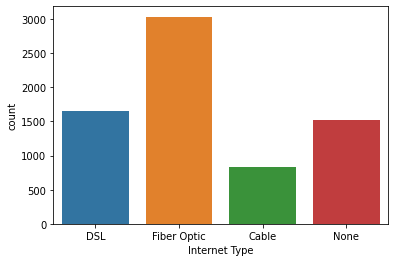

In [20]:
# make a histogram of internet type
sns.countplot(x='Internet Type', data=dataset)


<AxesSubplot:ylabel='Internet Type'>

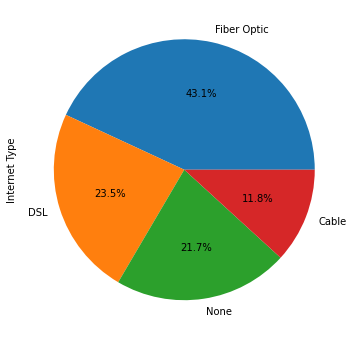

In [23]:
# make a pie chart of internet type 
internet_type.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

  Internet Type  Churn Value  percentage
0         Cable            0   74.337349
1         Cable            1   25.662651
2           DSL            0   81.416465
3           DSL            1   18.583535
4   Fiber Optic            0   59.275124
5   Fiber Optic            1   40.724876
6          None            0   92.595020
7          None            1    7.404980


<AxesSubplot:xlabel='Internet Type', ylabel='percentage'>

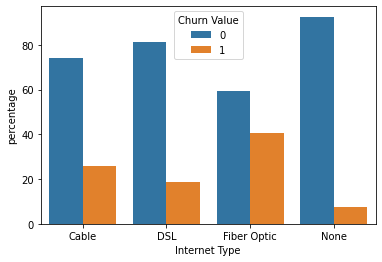

In [32]:
# calculate the proportion of churn value for each Internet service type
Internet_Type_churn = dataset.groupby(['Internet Type'])['Churn Value'].value_counts(
    normalize=True).rename('percentage').mul(100).reset_index()

# print the proportion of churn value for each Internet service type
print(Internet_Type_churn)

# plot the proportion of churn value for each Internet service type
sns.barplot(x="Internet Type", y="percentage",
            hue="Churn Value", data=Internet_Type_churn)



#### Results Interpretation
Based on our analysis of the Telco Customer Churn dataset, we found that the distribution of customers across different Internet service types is as follows: 43.1% for Fiber Optic, 23.5% for DSL, 11.8% for Cable, and 21.7% did not have any Internet service.

When we analyzed the churn value for each service type, we found that Fiber Optic and Cable services have the highest churn rates at 40.7% and 25.7%, respectively. On the other hand, customers who do not have any Internet service have the lowest churn rate at 7.4%, and DSL customers have a relatively low churn rate at 18.6%.

Overall, our findings suggest that the company should focus on identifying and addressing the reasons why customers are churning for Fiber Optic and Cable services. This could involve improving the quality of service, offering better pricing plans, or providing additional incentives to retain customers. Additionally, the company may want to explore why customers who do not have any Internet service are not subscribing, and develop strategies to address any barriers. The low churn rate for DSL customers indicates that the company should focus on retaining existing DSL customers and potentially offer incentives to encourage customers to switch from other service types to DSL.

In [ ]:
# save the internet type and churn value to an excel file
columns = ['Internet Type', 'Churn Value']
newDataset = dataset[columns]
newDataset.to_excel('internet_type_churn.xlsx', index=False)
